# Twitter Dataset Sentiment Analysis

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

# Load the CSV file into a DataFrame
data = pd.read_csv(r'C:\Users\hrith\Downloads\Oasis\Twitter_data.csv')

# Display the first few rows of the dataset
print(data.head())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ''  # Return an empty string for non-string inputs
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize text
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

# Apply text cleaning to the 'clean_text' column
data['cleaned_text'] = data['clean_text'].apply(clean_text)

# Check cleaned text
print(data['cleaned_text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hrith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    modi promised minimum government maximum gover...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporter prefix chowkidar name modi gr...
4    answer among powerful world leader today trump...
Name: cleaned_text, dtype: object


In [17]:
pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\nltk.exe' -> 'C:\\Python312\\Scripts\\nltk.exe.deleteme'



## Feature Engineering

In [4]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the cleaned text data into TF-IDF features
X = tfidf.fit_transform(data['cleaned_text']).toarray()

# Target variable (assuming 'sentiment' is the column for labels)
y = data['category']


## Train-test split

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')


Training set size: 130384
Test set size: 32596


## Machine Learning Models

In [6]:
print(y_train.isna().sum())


7


In [7]:
data = data.dropna(subset=['category'])


In [8]:
mode_sentiment = data['category'].mode()[0]
data['category'] = data['category'].fillna(mode_sentiment)


In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'cleaned_text' is your feature and 'sentiment' is your target
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

        -1.0       0.88      0.43      0.58      7230
         0.0       0.82      0.65      0.73     10961
         1.0       0.65      0.92      0.76     14404

    accuracy                           0.72     32595
   macro avg       0.78      0.67      0.69     32595
weighted avg       0.76      0.72      0.71     32595

Accuracy:  0.721153551158153


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)  # Reduce features
X = tfidf.fit_transform(data['cleaned_text']).toarray()  # Keep it as sparse

# Target variable
y = data['category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear SVM classifier
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

        -1.0       0.81      0.58      0.67      7230
         0.0       0.71      0.95      0.81     10961
         1.0       0.88      0.77      0.82     14404

    accuracy                           0.79     32595
   macro avg       0.80      0.77      0.77     32595
weighted avg       0.81      0.79      0.79     32595

Accuracy:  0.7906120570639669


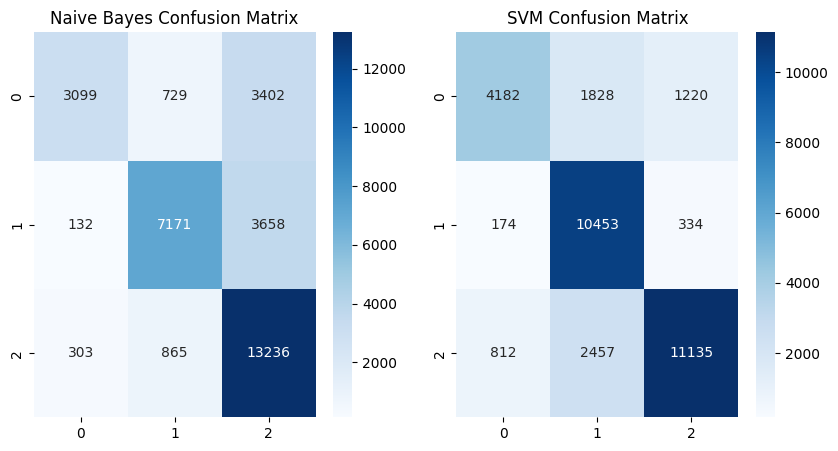

In [12]:
# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')

plt.show()


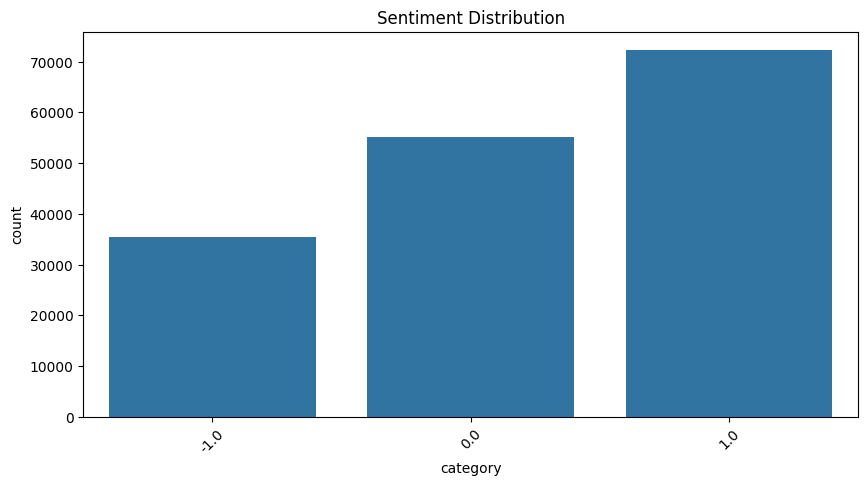

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='category')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()
